# Step 5 - Testing the Model

Now that our model is trained, it's time to put it to the test.

We'll pass it some images it hasn't seen before and study the model's predictions. Based on our findings, we will set a threshold on which it will classify our images.

In [1]:
# import dependencies
from image_preprocessor import ImagePreprocessor
import visuals

from keras.models import load_model
import os
import numpy as np

Using TensorFlow backend.


In [2]:
test_dir = 'testimages'
model_location = os.path.join('..', 'application', 'saved_models')
model_name = 'cnn_image_model.hdf5'

In [3]:
model = load_model(os.path.join(model_location, model_name))

In [4]:
preprocessor = ImagePreprocessor()
preprocessor.root_dir = os.path.join('..', 'application', 'images')
preprocessor.initialize()
categories = preprocessor.categories

6 image categories
465 total images

279 training images
93 validation images
93 test images

Categories:
  - animal
  - city_scape
  - food
  - group
  - landscape
  - me


In [5]:
# takes an image location and a model and returns an array of predictions
def predict_category(img_path, pred_model):
    img_tensor = preprocessor.file_to_tensor(img_path)
    h = pred_model.predict(img_tensor)
    return h

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# plots the image and its probabilities
def plot_image_probs(imagepath, h, categories, threshold=0):
    plt.rcdefaults()

    # plot the image
    img = mpimg.imread(imagepath)
    fig = plt.figure()
    a = fig.add_subplot(2,2,1)
    a = plt.imshow(img)
    plt.axis('off')

    # plot the probabilities
    y_pos = np.arange(len(categories))
    b = fig.add_subplot(2,2,2)
    b.barh(y_pos, h, align='center', color='grey')
    b.set_yticks(y_pos)
    b.set_yticklabels(categories)
    b.invert_yaxis()
    b.set_xlabel('Probability')
    if threshold > 0:
        b.axvline(threshold, ls='--', color='r')
    plt.xlim(0, 1.0)

    plt.show()
    return

## Visualizing the Predictions

I put some images in a separate directory. We'll load our previously trained model and then pass those images to it, plotting the model's predictions.

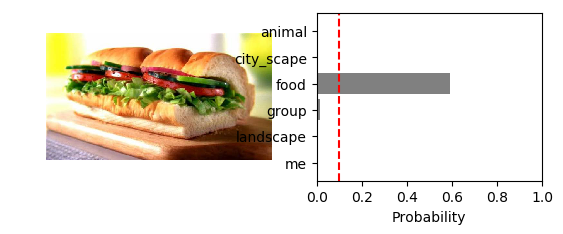

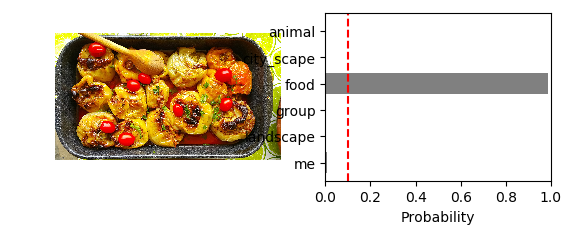

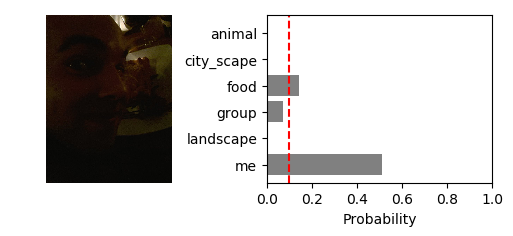

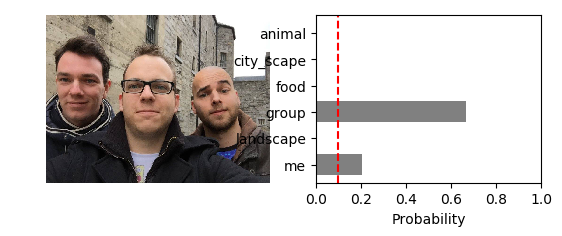

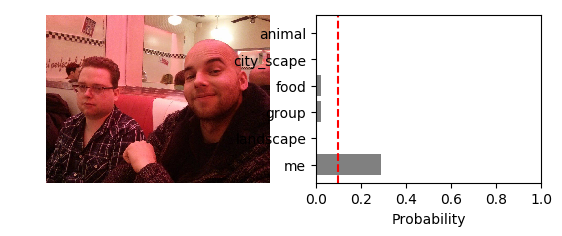

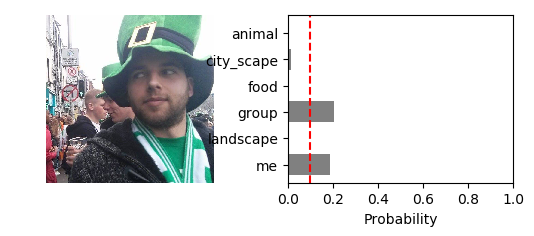

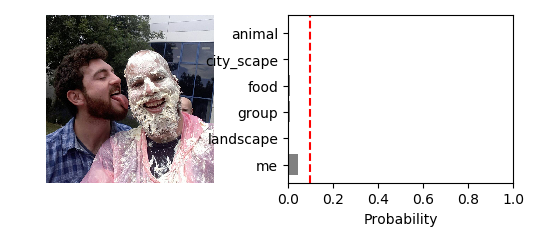

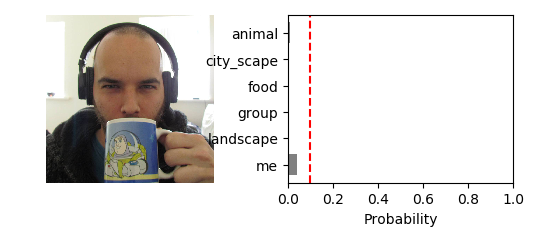

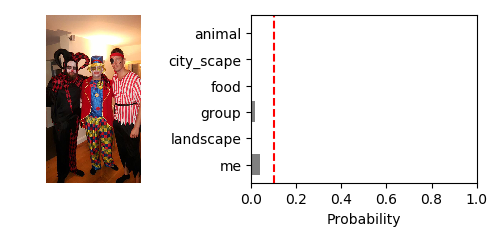

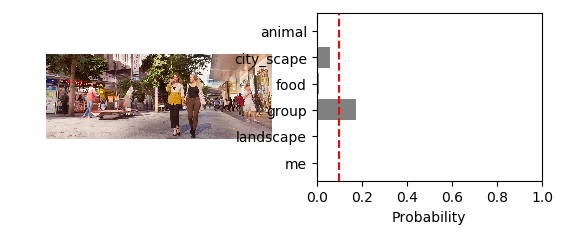

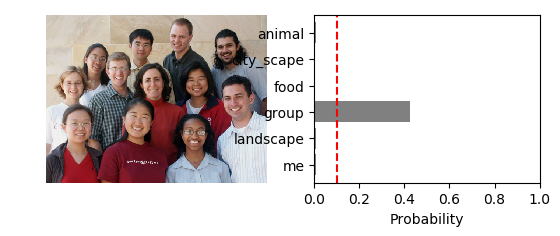

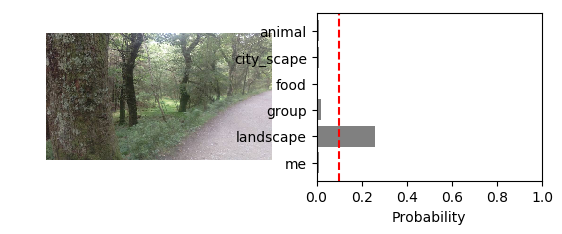

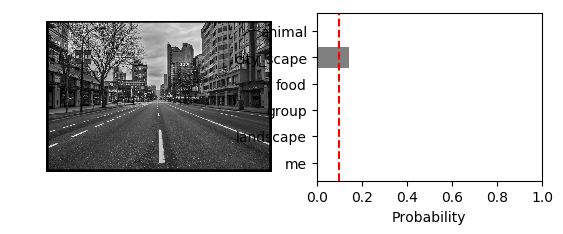

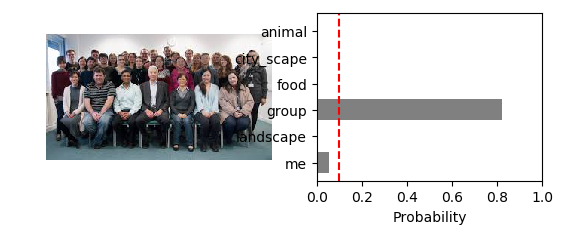

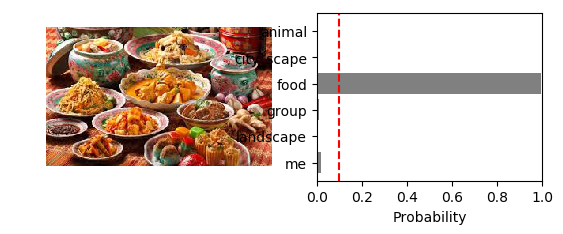

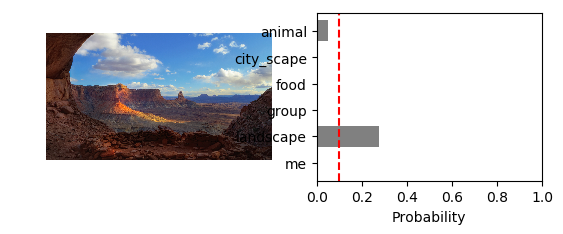

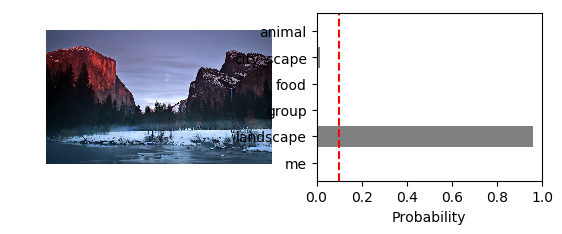

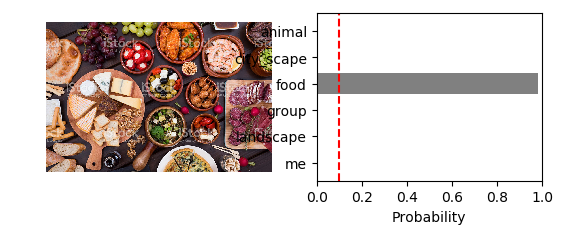

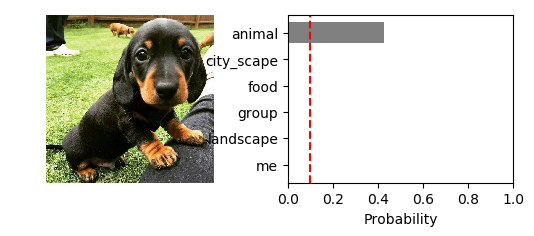

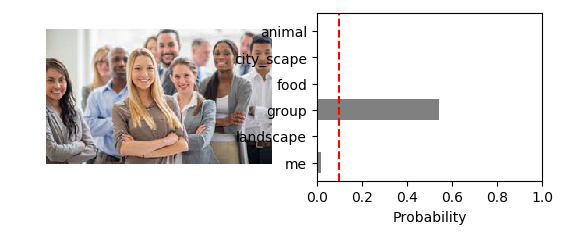

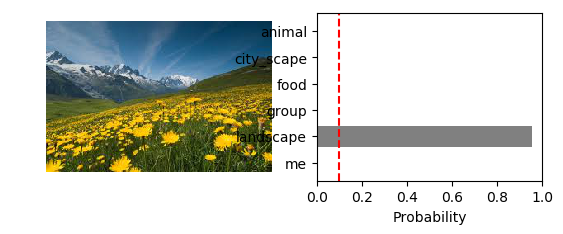

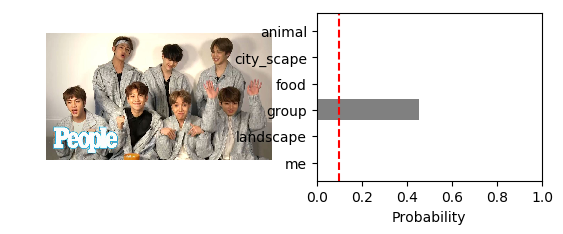

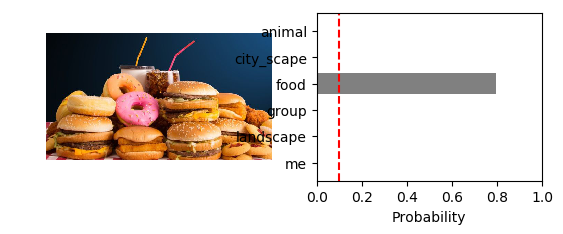

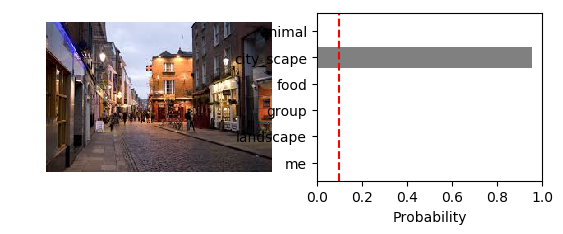

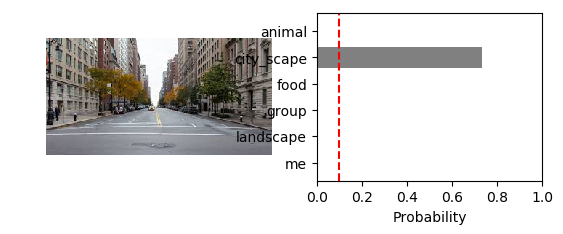

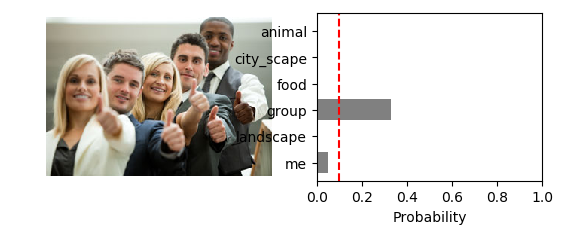

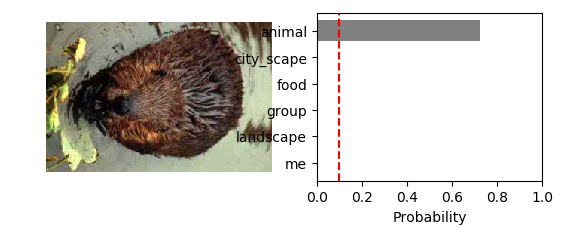

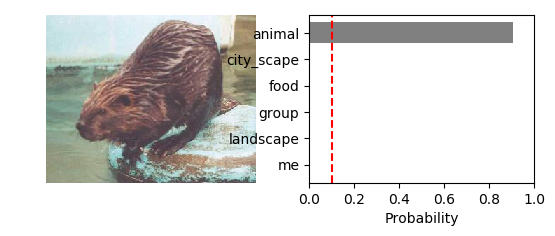

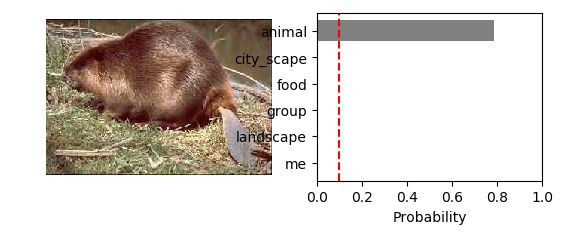

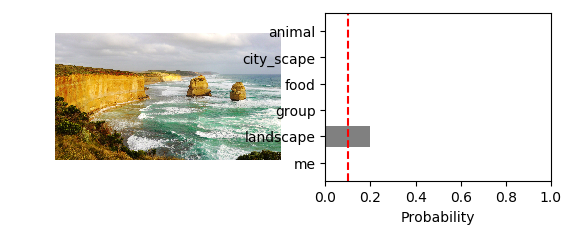

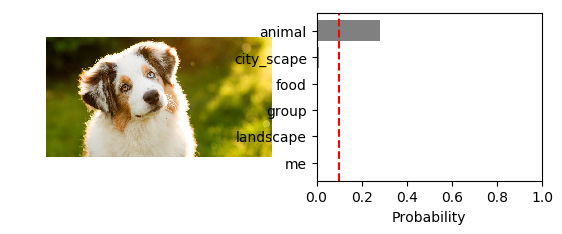

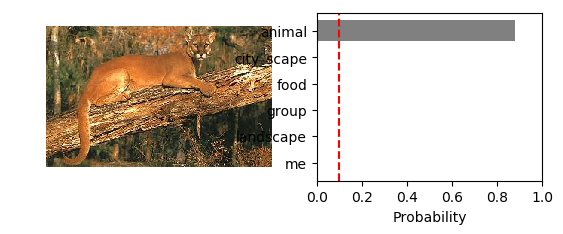

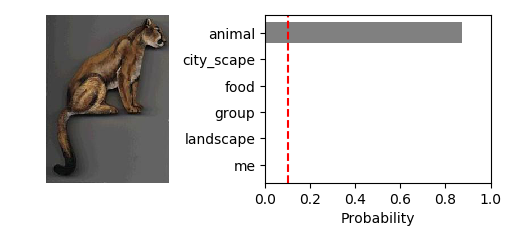

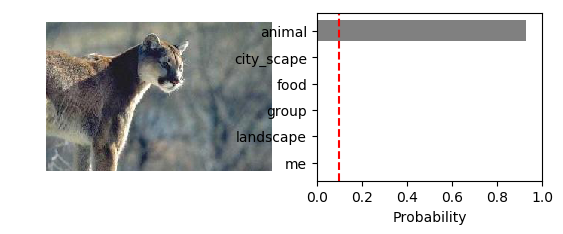

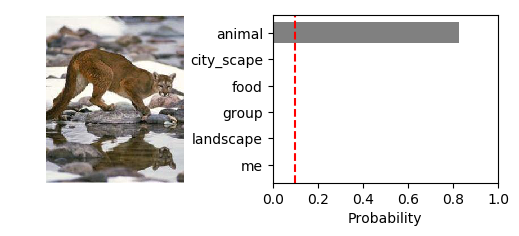

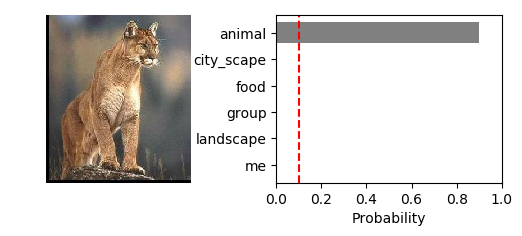

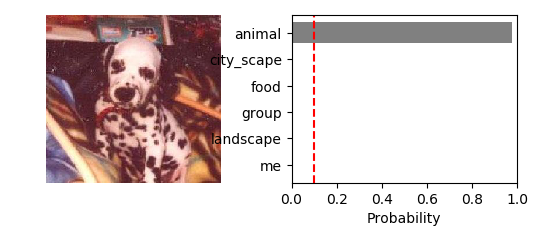

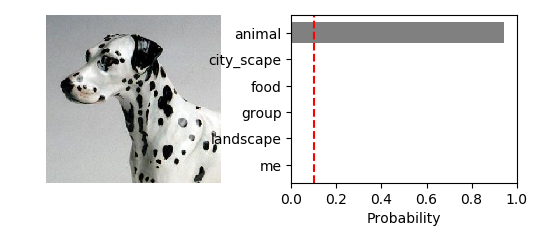

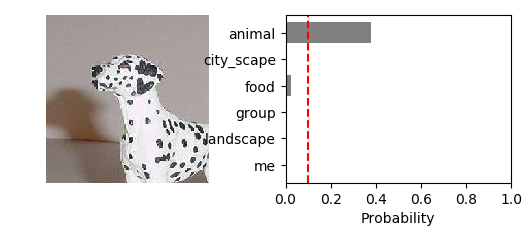

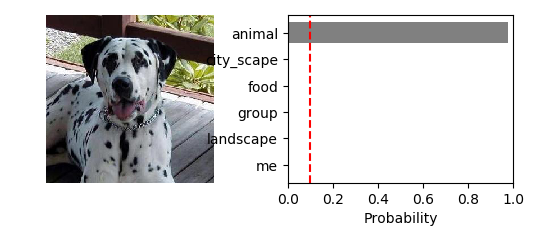

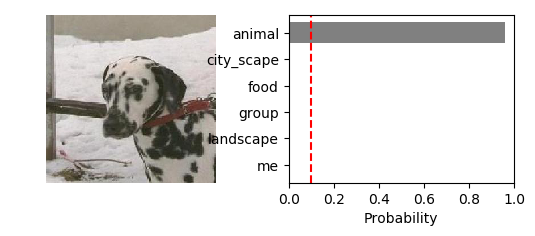

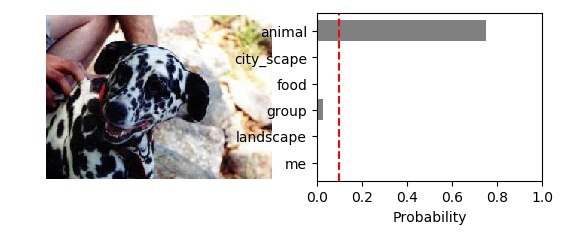

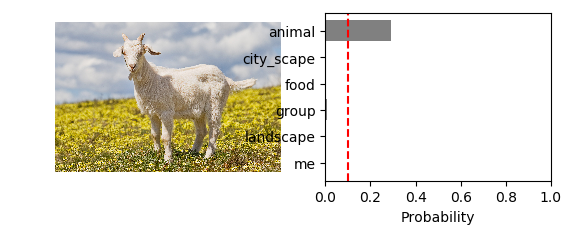

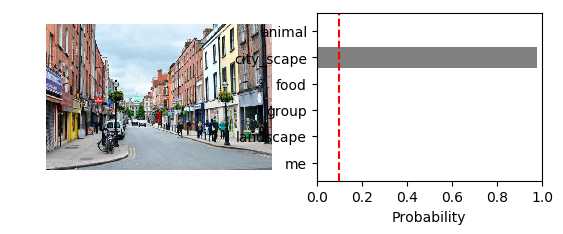

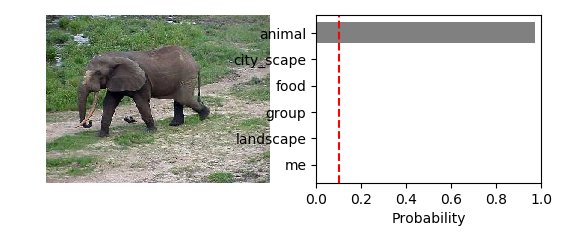

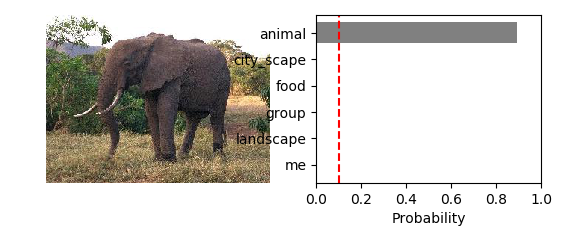

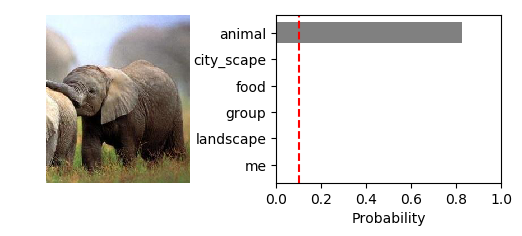

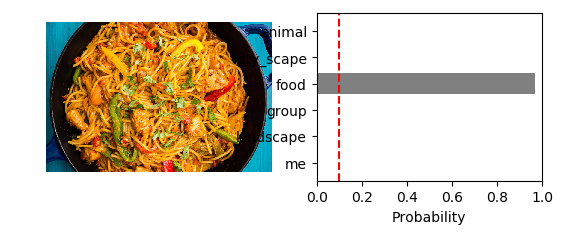

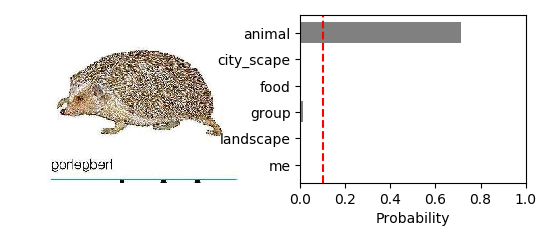

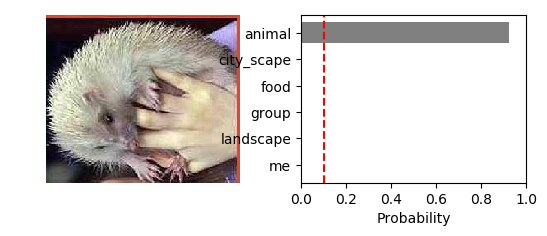

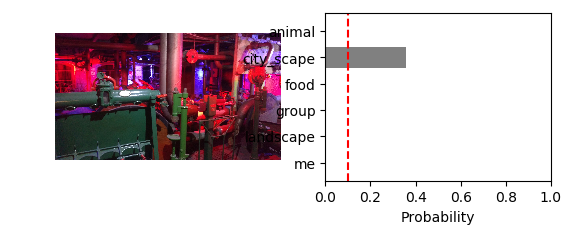

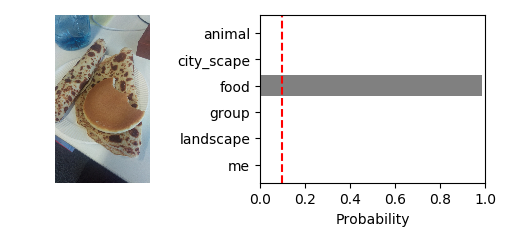

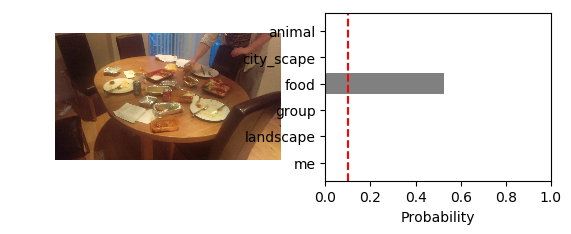

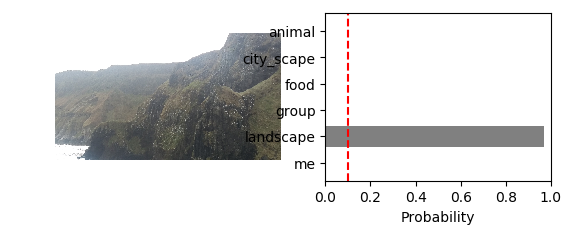

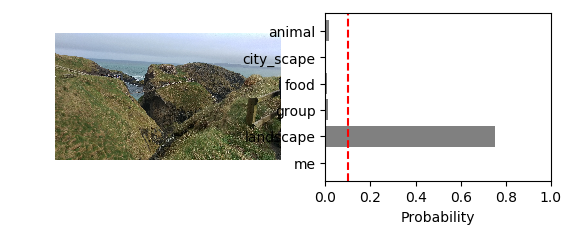

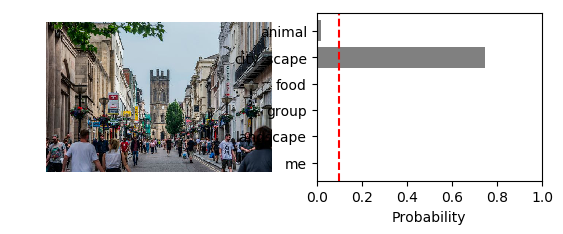

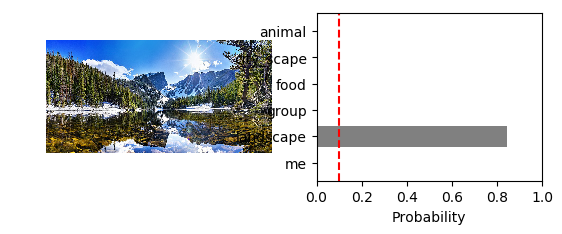

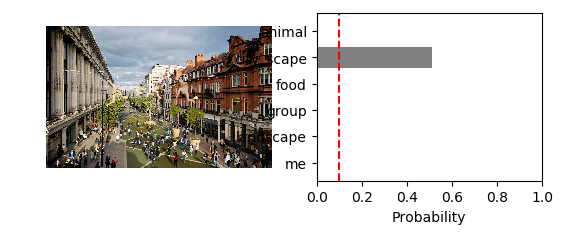

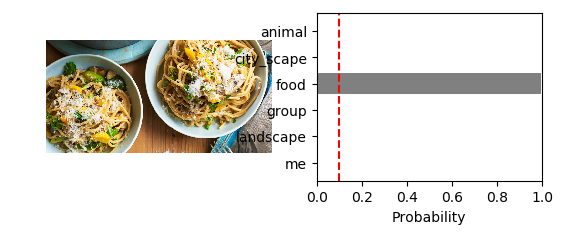

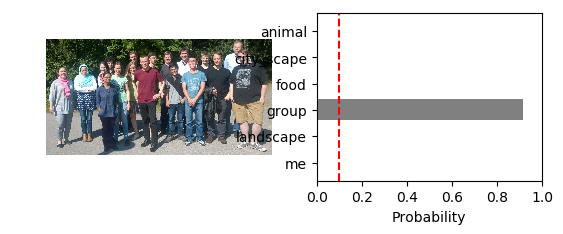

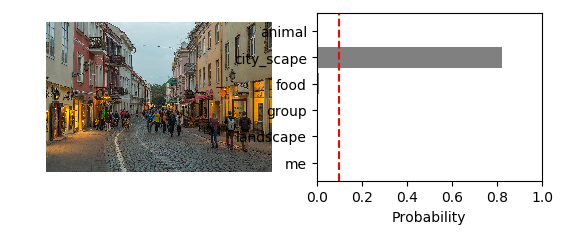

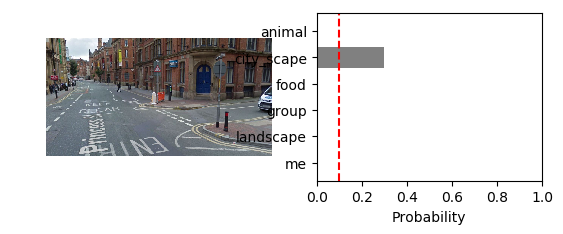

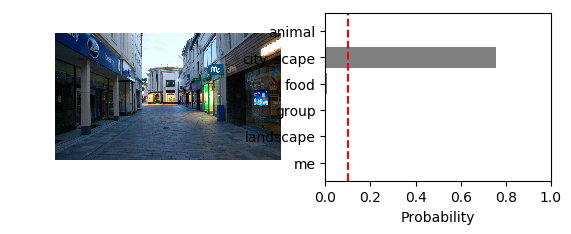

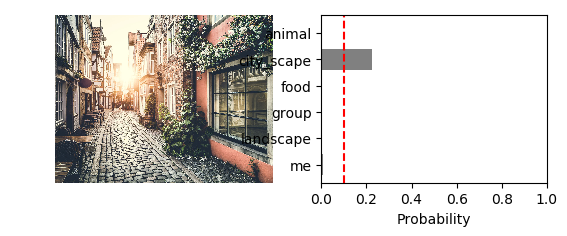

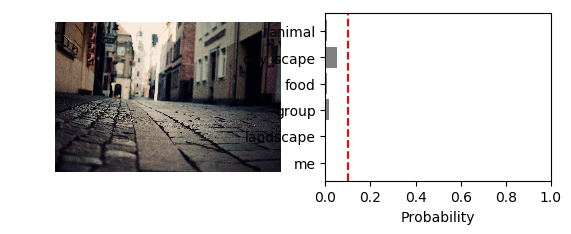

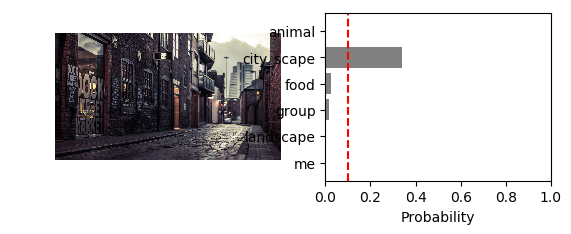

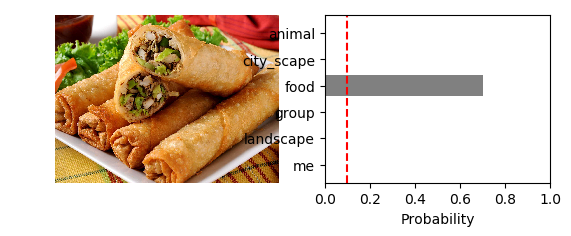

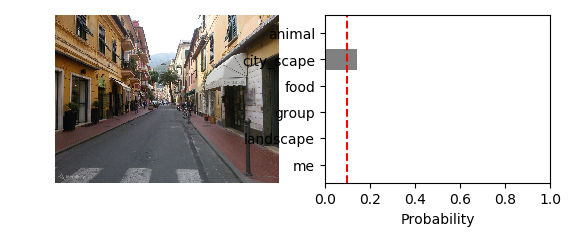

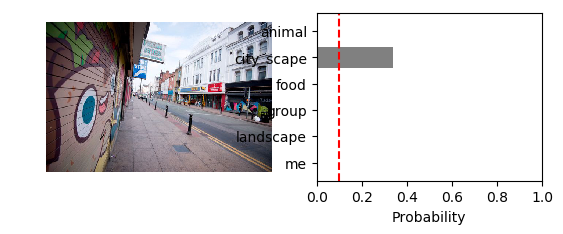

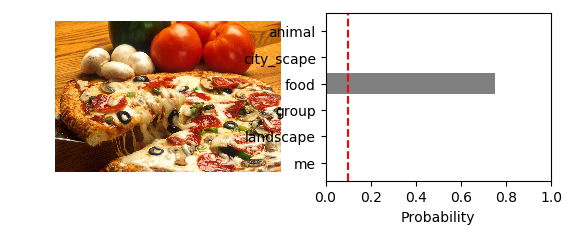

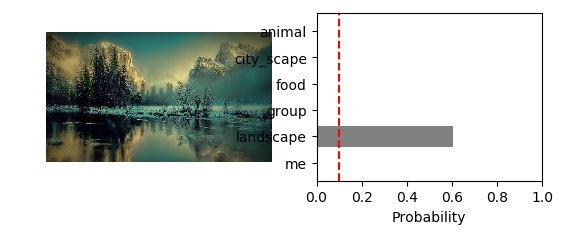

In [10]:
for file in os.listdir(test_dir):
    h = predict_category(os.path.join(test_dir, file), model)[0]
    plot_image_probs(os.path.join(test_dir, file), h, categories, 0.10)

## Conclusion

I'm very happy with the model's outputs. I've set the threshold to 0.1, meaning that the model will clasify images that have a prediction higher than 0.1. Looking at the graphs, we see that it classifies most images correctly.

Some of the images where my face is obstructed don't classify correctly, which is understandable. There's one very dark image of my face with some food in the background. The model correctly classified the images as both a picture of me and a picture of food.